# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [6]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [8]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [10]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [11]:
# Extract all rows of data
# Find the table on the page
table = soup.find('table')

# Use Pandas to read the table into a DataFrame
mars_weather_df = pd.read_html(str(table))[0]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [12]:
# Create an empty list
data_rows = []
# Loop through the scraped data to create a list of rows
for row in table.find_all('tr'):
    cols = row.find_all('td')
    if cols:
        data_row = [col.text.strip() for col in cols]
        data_rows.append(data_row)

In [14]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
# Create a Pandas DataFrame using the list of rows and column names
mars_weather_df = pd.DataFrame(data_rows, columns=column_names)

In [17]:
# Confirm DataFrame was created successfully
print(mars_weather_df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [18]:
# Examine data types of each column
data_types = mars_weather_df.dtypes
print("Data Types:")
print(data_types)


Data Types:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [19]:
# Change data types for data analysis
# Convert the 'terrestrial_date' column to datetime
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert the 'sol' column to integers
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)

# Convert the 'min_temp' column to float
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)


In [20]:
# Confirm type changes were successful by examining data types again
data_types_after_conversion = mars_weather_df.dtypes
print("Data Types After Type Changes:")
print(data_types_after_conversion)

Data Types After Type Changes:
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                          object
month                       object
min_temp                   float64
pressure                    object
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [21]:
# 1. How many months are there on Mars?
num_months_on_mars = mars_weather_df['month'].nunique()
print("Number of months on Mars:", num_months_on_mars)


Number of months on Mars: 12


In [22]:
# 2. How many Martian days' worth of data are there?
num_martian_days_data = len(mars_weather_df)
print("Number of Martian days' worth of data:", num_martian_days_data)

Number of Martian days' worth of data: 1867


In [32]:
# 3. What is the average low temperature by month?

# Group the data by 'month' and calculate the mean temperature for each month
average_low_temperature_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Print the result
print("Average low temperature by month:")
print(average_low_temperature_by_month)

# Find the month with the lowest temperature
lowest_temp_month = average_low_temperature_by_month.idxmin()
lowest_temp = average_low_temperature_by_month.min()

# Find the month with the highest temperature
highest_temp_month = average_low_temperature_by_month.idxmax()
highest_temp = average_low_temperature_by_month.max()

# Print the results
print(f"The month with the lowest average temperature is {lowest_temp_month} with an average low temperature of {lowest_temp:.2f}°C.")
print(f"The month with the highest average temperature is {highest_temp_month} with an average low temperature of {highest_temp:.2f}°C.")



Average low temperature by month:
month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64
The month with the lowest average temperature is 3 with an average low temperature of -83.31°C.
The month with the highest average temperature is 8 with an average low temperature of -68.38°C.


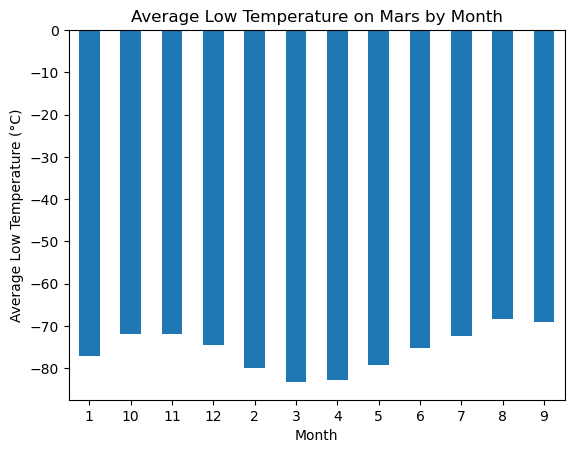

In [24]:
# Plot the average temperature by month
average_low_temperature_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Low Temperature (°C)')
plt.title('Average Low Temperature on Mars by Month')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


In [25]:
# Identify the coldest and hottest months in Curiosity's location
# Sort the data by average low temperature in ascending order
sorted_by_temperature = average_low_temperature_by_month.sort_values()

# The coldest month is the first entry (lowest temperature)
coldest_month = sorted_by_temperature.index[0]

# The hottest month is the last entry (highest temperature)
hottest_month = sorted_by_temperature.index[-1]

# Print the results
print("Coldest month in Curiosity's location:", coldest_month)
print("Hottest month in Curiosity's location:", hottest_month)

Coldest month in Curiosity's location: 3
Hottest month in Curiosity's location: 8


In [34]:
# 4. Average pressure by Martian month

# Ensure the 'pressure' column contains string values
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(str)

# Clean the 'pressure' column by removing non-numeric characters and converting to numeric
mars_weather_df['pressure'] = mars_weather_df['pressure'].str.replace(r'[^0-9.]', '', regex=True).astype(float)


# Calculate the average pressure by Martian month
average_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Print the result
print("Average pressure by Martian month:")
print(average_pressure_by_month)

# Find the month with the lowest atmospheric pressure
lowest_pressure_month = average_pressure_by_month.idxmin()
lowest_pressure = average_pressure_by_month.min()

# Find the month with the highest atmospheric pressure
highest_pressure_month = average_pressure_by_month.idxmax()
highest_pressure = average_pressure_by_month.max()

# Print the results
print(f"The month with the lowest average atmospheric pressure is {lowest_pressure_month} with an average pressure of {lowest_pressure:.2f}.")
print(f"The month with the highest average atmospheric pressure is {highest_pressure_month} with an average pressure of {highest_pressure:.2f}.")


Average pressure by Martian month:
month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64
The month with the lowest average atmospheric pressure is 6 with an average pressure of 745.05.
The month with the highest average atmospheric pressure is 9 with an average pressure of 913.31.


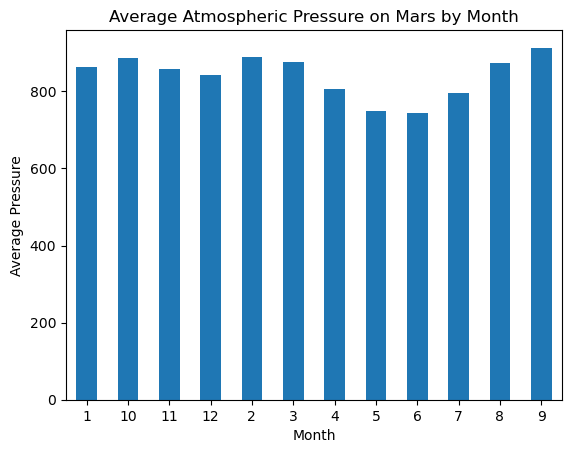

In [28]:
# Plot the average pressure by month
average_pressure_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Pressure')
plt.title('Average Atmospheric Pressure on Mars by Month')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


In [29]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Number of Martian sols in a Martian year (approximately 687 Earth days)
martian_sols_in_martian_year = 687

# Number of Earth days in a Martian year (estimated)
earth_days_in_martian_year = martian_sols_in_martian_year * (1.0275)  # An approximate value

# Print the result
print("Number of terrestrial (Earth) days in a Martian year:", earth_days_in_martian_year)

Number of terrestrial (Earth) days in a Martian year: 705.8925


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [30]:
# Write the data to a CSV file
mars_weather_df.to_csv('mars_weather_data.csv', index=False)

In [31]:
browser.quit()